In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn .linear_model import LinearRegression 
from sklearn .linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [2]:
titanic=pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# See the description

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# See the total no.of rows and columns

In [8]:
titanic.shape

(891, 12)

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

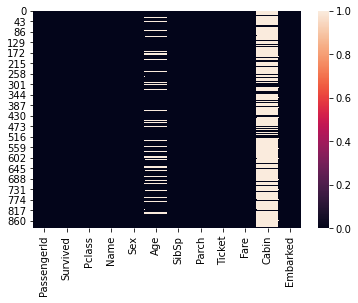

In [10]:
sns.heatmap(titanic.isnull())

In [11]:
# Handling Null values

In [12]:
titanic.fillna(0,inplace=True)

In [13]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

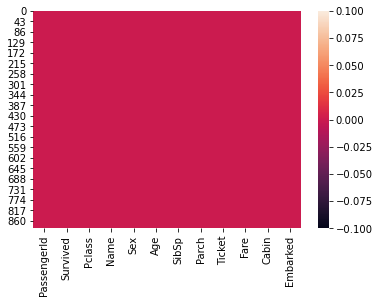

In [14]:
sns.heatmap(titanic.isnull())

In [15]:
# count of no.od survivour

In [16]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
# visualising the data

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


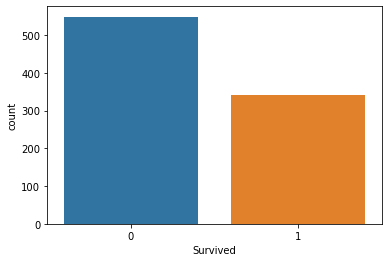

In [18]:
sns.countplot(titanic['Survived'])
plt.show()


In [19]:
# see the male and female percentage of survived or not survived

<function matplotlib.pyplot.show(close=None, block=None)>

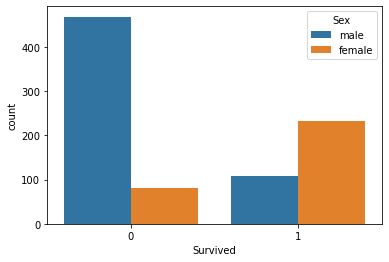

In [20]:
sns.countplot(x='Survived',hue="Sex",data=titanic)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

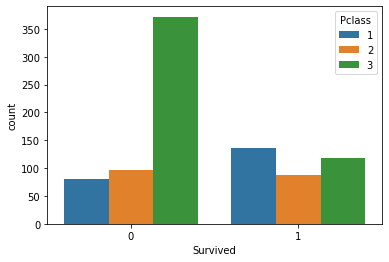

In [21]:
sns.countplot(x='Survived',hue="Pclass",data=titanic)
plt.show

In [22]:
# Model Building Process

In [23]:
# Firstly we need to convert categorical columns to apply Logistic regresstion

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [25]:
# Using One hot encoding to convert categorical values into numeric values

In [26]:
pd.get_dummies(titanic['Sex']).head(10)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [27]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
pd.get_dummies(titanic['Embarked']).head(5)

,0,C,Q,S
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [29]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [30]:
pd.get_dummies(titanic['Pclass']).head(5)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [31]:
pclass=pd.get_dummies(titanic['Pclass'],drop_first=True)
pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [32]:
titanic=pd.concat([titanic,sex,embark,pclass],axis=1)

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1,0,0,1,0,1


In [34]:
titanic.drop(['Name','Pclass','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [35]:
titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,male,C,Q,S,2,3
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,C85,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,C123,0,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,1


In [36]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [37]:
titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,1,0,1


# Model Creation

In [38]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Logistic Regression

In [40]:

lm=LogisticRegression()

In [41]:
lm.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# check for train data

In [42]:
X_train_prediction = lm.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, y_train)
training_data_accuracy

0.8186195826645265

# check for test data

In [43]:
X_test_prediction = lm.predict(X_test)
lm_acc_test= accuracy_score(X_test_prediction,y_test)
lm_acc_test

0.7873134328358209

In [44]:
lm_y_pred=lm.predict(X_train)
lm_acc=round(lm.score(X_train,y_train)*100)
lm_acc


82

# Check using confusion matrix

In [45]:
from sklearn .metrics import classification_report

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
prediction=lm.predict(X_test)


In [48]:
confusion_matrix(y_test,prediction)

array([[148,  20],
       [ 37,  63]], dtype=int64)

In [49]:
accuracy_score(y_test,prediction)

0.7873134328358209

# Decision Tree

In [50]:

from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc=DecisionTreeClassifier()

In [52]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
dtc_y_pred=dtc.predict(X_train)
dtc_acc=round(dtc.score(X_train,y_train)*100)
dtc_acc


100

In [54]:
dtc_y_pred=dtc.predict(X_test)
dtc_acc_test=round(dtc.score(X_test,y_test)*100)
dtc_acc_test


69

# KNN Model

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
knn_y_pred=knn.predict(X_test)
knn_acc=round(knn.score(X_train,y_train)*100)
knn_acc

75

In [58]:
knn_y_pred=knn.predict(X_test)
knn_acc_test=round(knn.score(X_test,y_test)*100)
knn_acc_test

60

# Linear Support Vector Machine

In [59]:
from sklearn.svm import LinearSVC,SVC

In [60]:
lsvc=LinearSVC()
lsvc.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [61]:
lsvc_y_pred=lsvc.predict(X_train)
lsvc_acc=round(lsvc.score(X_train,y_train)*100,2)
lsvc_acc

76.24

In [62]:
lsvc_y_pred=lsvc.predict(X_test)
lsvc_acc_test=round(lsvc.score(X_test,y_test)*100)
lsvc_acc_test


72

# Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
rfc_y_pred=lsvc.predict(X_train)
rfc_acc=round(rfc.score(X_train,y_train)*100,2)
rfc_acc

100.0

In [66]:
rfc_y_pred=rfc.predict(X_test)
rfc_acc_test=round(rfc.score(X_test,y_test)*100)
rfc_acc_test

80

In [70]:
result=pd.DataFrame({'Models':['Logistic Regression','Support Vector Machine','KNN','Decision Tree','Random Forest'],
                    'Score_train':[lm_acc,lsvc_acc,knn_acc,dtc_acc,rfc_acc],'Score_test':[lm_acc_test,lsvc_acc_test,knn_acc_test,
                                   dtc_acc_test,rfc_acc_test ]})
result

,Models,Score_train,Score_test
0,Logistic Regression,82.00,0.787313
1,Support Vector Machine,76.24,72.000000
2,KNN,75.00,60.000000
3,Decision Tree,100.00,69.000000
4,Random Forest,100.00,80.000000


In [72]:
result.sort_values(by='Score_test',ascending=False)

,Models,Score_train,Score_test
4,Random Forest,100.00,80.000000
1,Support Vector Machine,76.24,72.000000
3,Decision Tree,100.00,69.000000
2,KNN,75.00,60.000000
0,Logistic Regression,82.00,0.787313


In [73]:
# We can clearly see  Random forest is giving an accurate and stable prediction.

In [74]:
# Cross Validation for Random forest

In [75]:
from sklearn.model_selection import cross_val_score

In [77]:
# For Traint data
rf=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(rf,X_train,y_train,cv=10,scoring="accuracy")
print("scores:",scores)
print("Mean:",scores.mean())
print("Standard Deviation:",scores.std())

scores: [0.87301587 0.76190476 0.80952381 0.80645161 0.82258065 0.85483871
 0.80645161 0.79032258 0.82258065 0.82258065]
Mean: 0.8170250896057347
Standard Deviation: 0.029476381757393418


In [78]:
# For Test Data
rf=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(rf,X_test,y_test,cv=10,scoring="accuracy")
print("scores:",scores)
print("Mean:",scores.mean())
print("Standard Deviation:",scores.std())

scores: [0.88888889 0.77777778 0.74074074 0.81481481 0.62962963 0.81481481
 0.7037037  0.85185185 0.80769231 0.88461538]
Mean: 0.7914529914529913
Standard Deviation: 0.07734452449498254


In [79]:
# HyperTuning our model

In [82]:
random_forest=RandomForestClassifier(n_estimators=100,min_samples_leaf=1,min_samples_split=2,max_features='auto',random_state=None)
random_forest.fit(X_train,y_train)
Y_pred=random_forest.predict(X_test)

In [84]:
random_forest.score(X_train,y_train)

1.0

In [85]:
import pickle


In [86]:
filename= 'Titanic Survival Project'
pickle.dump(rfc, open(filename,'wb'))
